In [1]:
import csv
import json
import pvlib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Test with TMY

In [2]:
latitude, longitude = 37.8, -122.3 # San Francisco

data, months, inputs, metadata = pvlib.iotools.get_pvgis_tmy(
    latitude, longitude, outputformat='json', usehorizon=True, userhorizon=None, startyear=None, endyear=2014, map_variables=True, timeout=30, roll_utc_offset=None, coerce_year=None
)

In [3]:
data.tail()

,temp_air,relative_humidity,ghi,dni,dhi,IR(h),wind_speed,wind_direction,pressure
time(UTC),,,,,,,,,
2010-12-31 19:00:00+00:00,7.62,8.97,382.65,442.82,183.10,11.86,1.70,64.0,101842.0
2010-12-31 20:00:00+00:00,7.86,14.46,360.30,315.82,207.05,12.89,1.75,67.0,101852.0
2010-12-31 21:00:00+00:00,8.09,19.94,261.65,134.35,198.45,13.92,1.81,84.0,101792.0
2010-12-31 22:00:00+00:00,8.33,25.42,152.65,27.88,141.30,14.95,1.86,90.0,101782.0
2010-12-31 23:00:00+00:00,8.57,30.90,63.25,3.84,62.10,15.98,1.92,103.0,101772.0


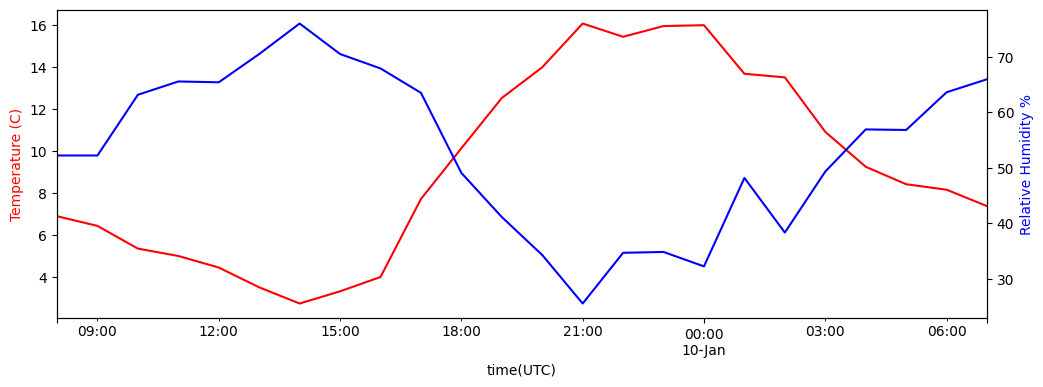

In [4]:
# Plor the temperature and humidity in a dual axis for the first 24 hours

day = 200

plt.figure(figsize=(12, 4))

ax1 = plt.gca()
ax2 = ax1.twinx()

data['temp_air'][day:day + 24].plot(ax=ax1, color='r')
data['relative_humidity'][day:day + 24].plot(ax=ax2, color='b')

ax1.set_ylabel('Temperature (C)', color='r')
ax2.set_ylabel('Relative Humidity %', color='b')

plt.show()

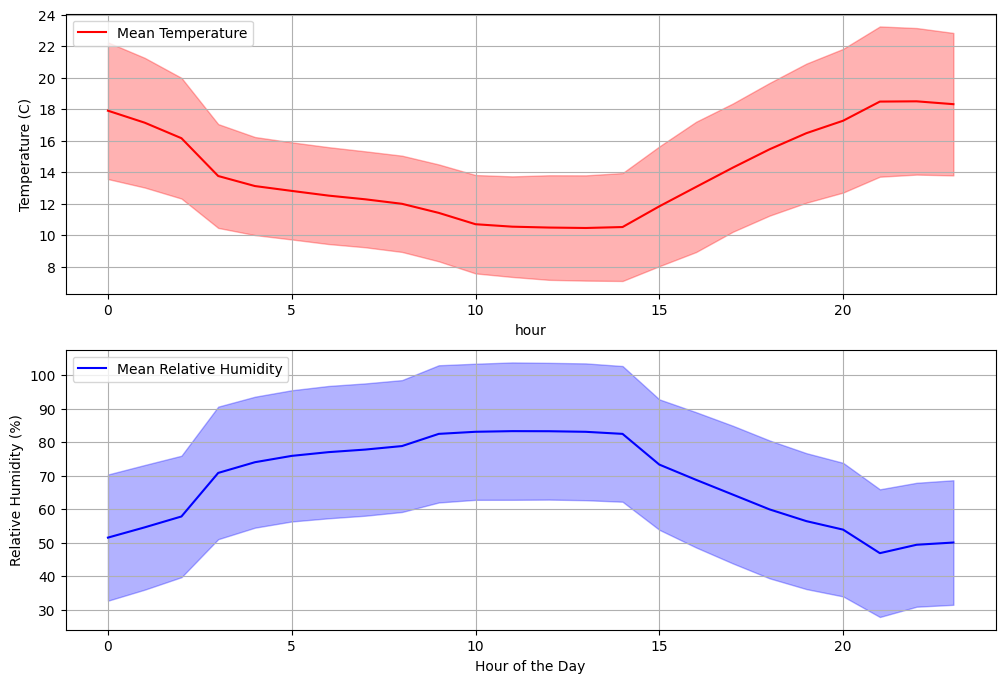

In [5]:
# Add the hour column to the data and plot the mean temperature and humidity for each hour of the day

data['hour'] = data.index.hour

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Calculate mean and variance for temperature
temp_mean = data.groupby('hour')['temp_air'].mean()
temp_std = data.groupby('hour')['temp_air'].std()

# Calculate mean and variance for relative humidity
humidity_mean = data.groupby('hour')['relative_humidity'].mean()
humidity_std = data.groupby('hour')['relative_humidity'].std()

# Plot mean temperature with variance envelope
sns.lineplot(x=temp_mean.index, y=temp_mean, color='r', label='Mean Temperature', ax=ax1)
ax1.fill_between(temp_mean.index, temp_mean - temp_std, temp_mean + temp_std, color='r', alpha=0.3)
ax1.set_ylabel('Temperature (C)')
ax1.grid()  # Add grid
ax1.legend(loc='upper left')

# Plot mean relative humidity with variance envelope
sns.lineplot(x=humidity_mean.index, y=humidity_mean, color='b', label='Mean Relative Humidity', ax=ax2)
ax2.fill_between(humidity_mean.index, humidity_mean - humidity_std, humidity_mean + humidity_std, color='b', alpha=0.3)
ax2.set_ylabel('Relative Humidity (%)')
ax2.grid()  # Add grid
ax2.legend(loc='upper left')

plt.xlabel('Hour of the Day')
plt.show()

In [6]:
latitude, longitude = 37.8, -122.3 # San Francisco

data, months, inputs, metadata = pvlib.iotools.get_pvgis_tmy(
    latitude, longitude, outputformat='json', usehorizon=True, userhorizon=None, startyear=2014, endyear=2023, map_variables=True, timeout=30, roll_utc_offset=None, coerce_year=None
)

In [7]:
data.tail()

,temp_air,relative_humidity,ghi,dni,dhi,IR(h),wind_speed,wind_direction,pressure
time(UTC),,,,,,,,,
2017-12-31 19:00:00+00:00,10.53,12.97,351.65,375.14,182.60,15.54,35.30,179.0,101942.0
2017-12-31 20:00:00+00:00,10.66,20.27,381.20,402.16,186.05,16.20,32.18,179.0,101912.0
2017-12-31 21:00:00+00:00,10.79,27.57,340.15,343.64,178.50,16.86,29.06,179.0,101862.0
2017-12-31 22:00:00+00:00,10.91,34.87,237.35,313.80,109.60,17.52,25.94,179.0,101862.0
2017-12-31 23:00:00+00:00,11.04,42.17,123.65,174.85,71.25,18.19,22.82,179.0,101802.0


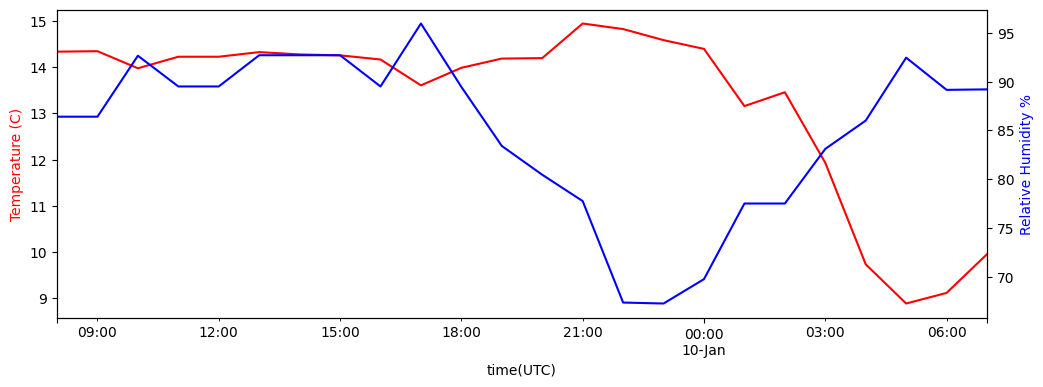

In [8]:
# Plor the temperature and humidity in a dual axis for the first 24 hours

day = 200

plt.figure(figsize=(12, 4))

ax1 = plt.gca()
ax2 = ax1.twinx()

data['temp_air'][day:day + 24].plot(ax=ax1, color='r')
data['relative_humidity'][day:day + 24].plot(ax=ax2, color='b')

ax1.set_ylabel('Temperature (C)', color='r')
ax2.set_ylabel('Relative Humidity %', color='b')

plt.show()

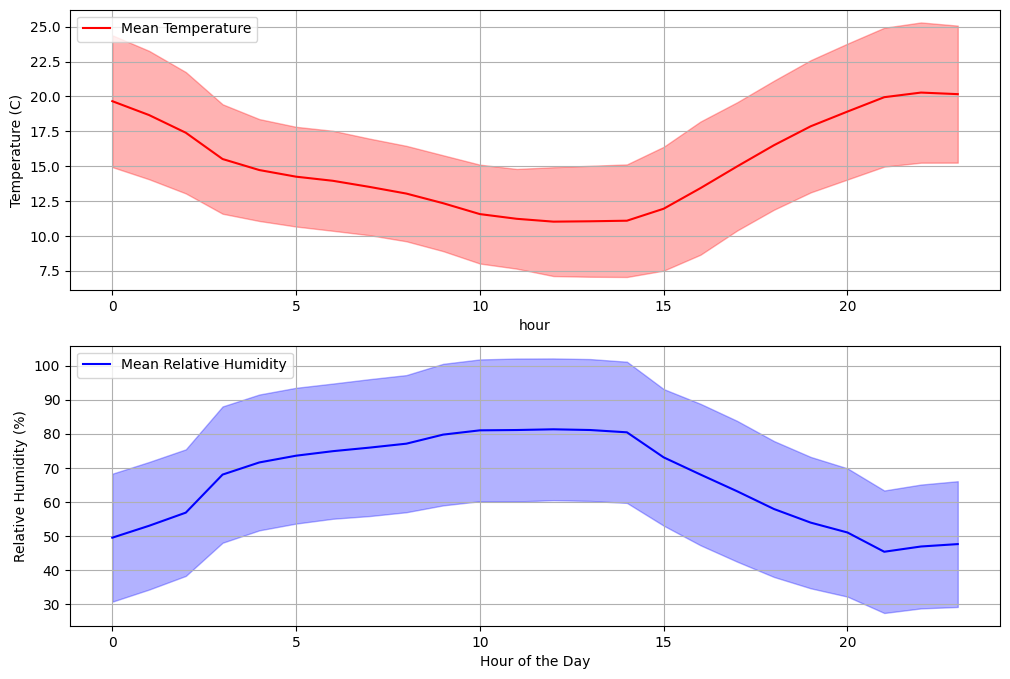

In [9]:
# Add the hour column to the data and plot the mean temperature and humidity for each hour of the day

data['hour'] = data.index.hour

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Calculate mean and variance for temperature
temp_mean = data.groupby('hour')['temp_air'].mean()
temp_std = data.groupby('hour')['temp_air'].std()

# Calculate mean and variance for relative humidity
humidity_mean = data.groupby('hour')['relative_humidity'].mean()
humidity_std = data.groupby('hour')['relative_humidity'].std()

# Plot mean temperature with variance envelope
sns.lineplot(x=temp_mean.index, y=temp_mean, color='r', label='Mean Temperature', ax=ax1)
ax1.fill_between(temp_mean.index, temp_mean - temp_std, temp_mean + temp_std, color='r', alpha=0.3)
ax1.set_ylabel('Temperature (C)')
ax1.grid()  # Add grid
ax1.legend(loc='upper left')

# Plot mean relative humidity with variance envelope
sns.lineplot(x=humidity_mean.index, y=humidity_mean, color='b', label='Mean Relative Humidity', ax=ax2)
ax2.fill_between(humidity_mean.index, humidity_mean - humidity_std, humidity_mean + humidity_std, color='b', alpha=0.3)
ax2.set_ylabel('Relative Humidity (%)')
ax2.grid()  # Add grid
ax2.legend(loc='upper left')

plt.xlabel('Hour of the Day')
plt.show()

# Simple gegnerated data

In [10]:
b_data = []
for b in range(1, 6):
    # file_path = "./data/simple_data/Building_"+str(b)+".csv"
    file_path = "./data/opt_data/Building_"+str(b)+".csv"
    # file_path = "./data/gen_data/Building_"+str(b)+".csv"
    # file_path = "./data/ref_data/Building_"+str(b)+".csv"
    b_data.append(pd.read_csv(file_path))

In [11]:
w_data = []
for b in range(1, 6):
    # file_path = "./data/simple_data/weather_"+str(b)+".csv"
    file_path = "./data/opt_data/weather.csv"
    # file_path = "./data/simple_data/weather.csv"
    # file_path = "./data/gen_data/weather_"+str(b)+".csv"
    # file_path = "./data/ref_data/weather.csv"
    w_data.append(pd.read_csv(file_path))

In [12]:
# with open("./data/simple_data/schema.json") as f:
with open("./data/opt_data/schema.json") as f:
# with open("./data/gen_data/schema.json") as f:
# with open("./data/ref_data/schema.json") as f:
    train_dict = json.load(f)

## Check generated data

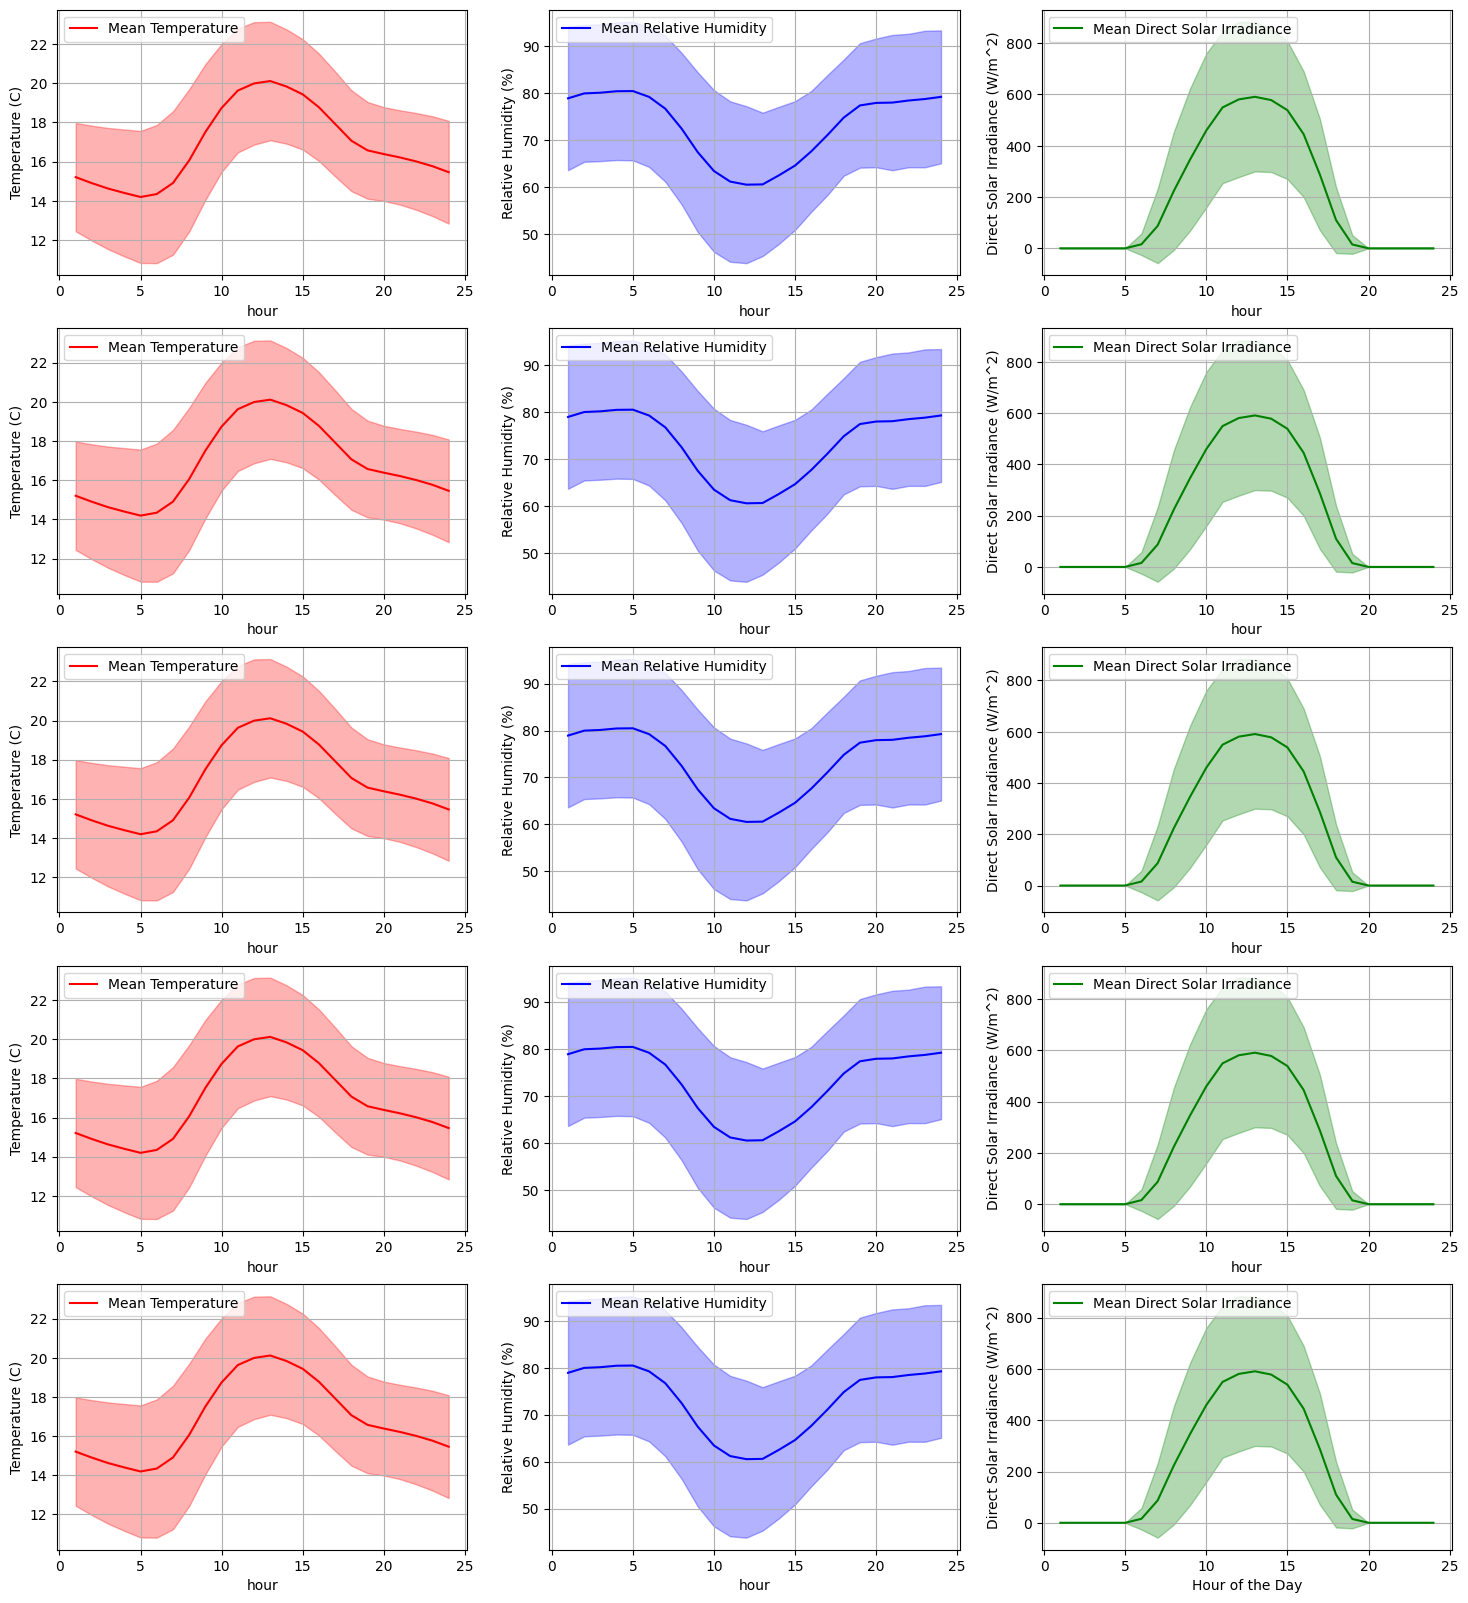

In [13]:
# Add the hour column to the data and plot the mean temperature, humidity, and direct solar irradiance for each hour of the day, for each building in subplots

fig, axs = plt.subplots(5, 3, figsize=(18, 20))

for b in range(5):

    w_data[b]['hour'] = b_data[b]['hour'].to_numpy()

    # Calculate mean and variance for temperature
    temp_mean = w_data[b].groupby('hour')['outdoor_dry_bulb_temperature'].mean()
    temp_std = w_data[b].groupby('hour')['outdoor_dry_bulb_temperature'].std()

    # Calculate mean and variance for relative humidity
    humidity_mean = w_data[b].groupby('hour')['outdoor_relative_humidity'].mean()
    humidity_std = w_data[b].groupby('hour')['outdoor_relative_humidity'].std()

    # Calculate mean and variance for direct solar irradiance
    solar_mean = w_data[b].groupby('hour')['direct_solar_irradiance'].mean()
    solar_std = w_data[b].groupby('hour')['direct_solar_irradiance'].std()

    # Plot mean temperature with variance envelope
    sns.lineplot(x=temp_mean.index, y=temp_mean, color='r', label='Mean Temperature', ax=axs[b, 0])
    axs[b, 0].fill_between(temp_mean.index, temp_mean - temp_std, temp_mean + temp_std, color='r', alpha=0.3)
    axs[b, 0].set_ylabel('Temperature (C)')
    axs[b, 0].grid()  # Add grid
    axs[b, 0].legend(loc='upper left')

    # Plot mean relative humidity with variance envelope
    sns.lineplot(x=humidity_mean.index, y=humidity_mean, color='b', label='Mean Relative Humidity', ax=axs[b, 1])
    axs[b, 1].fill_between(humidity_mean.index, humidity_mean - humidity_std, humidity_mean + humidity_std, color='b', alpha=0.3)
    axs[b, 1].set_ylabel('Relative Humidity (%)')
    axs[b, 1].grid()  # Add grid
    axs[b, 1].legend(loc='upper left')

    # Plot mean direct solar irradiance with variance envelope
    sns.lineplot(x=solar_mean.index, y=solar_mean, color='g', label='Mean Direct Solar Irradiance', ax=axs[b, 2])
    axs[b, 2].fill_between(solar_mean.index, solar_mean - solar_std, solar_mean + solar_std, color='g', alpha=0.3)
    axs[b, 2].set_ylabel('Direct Solar Irradiance (W/m^2)')
    axs[b, 2].grid()  # Add grid
    axs[b, 2].legend(loc='upper left')

plt.xlabel('Hour of the Day')
plt.show()

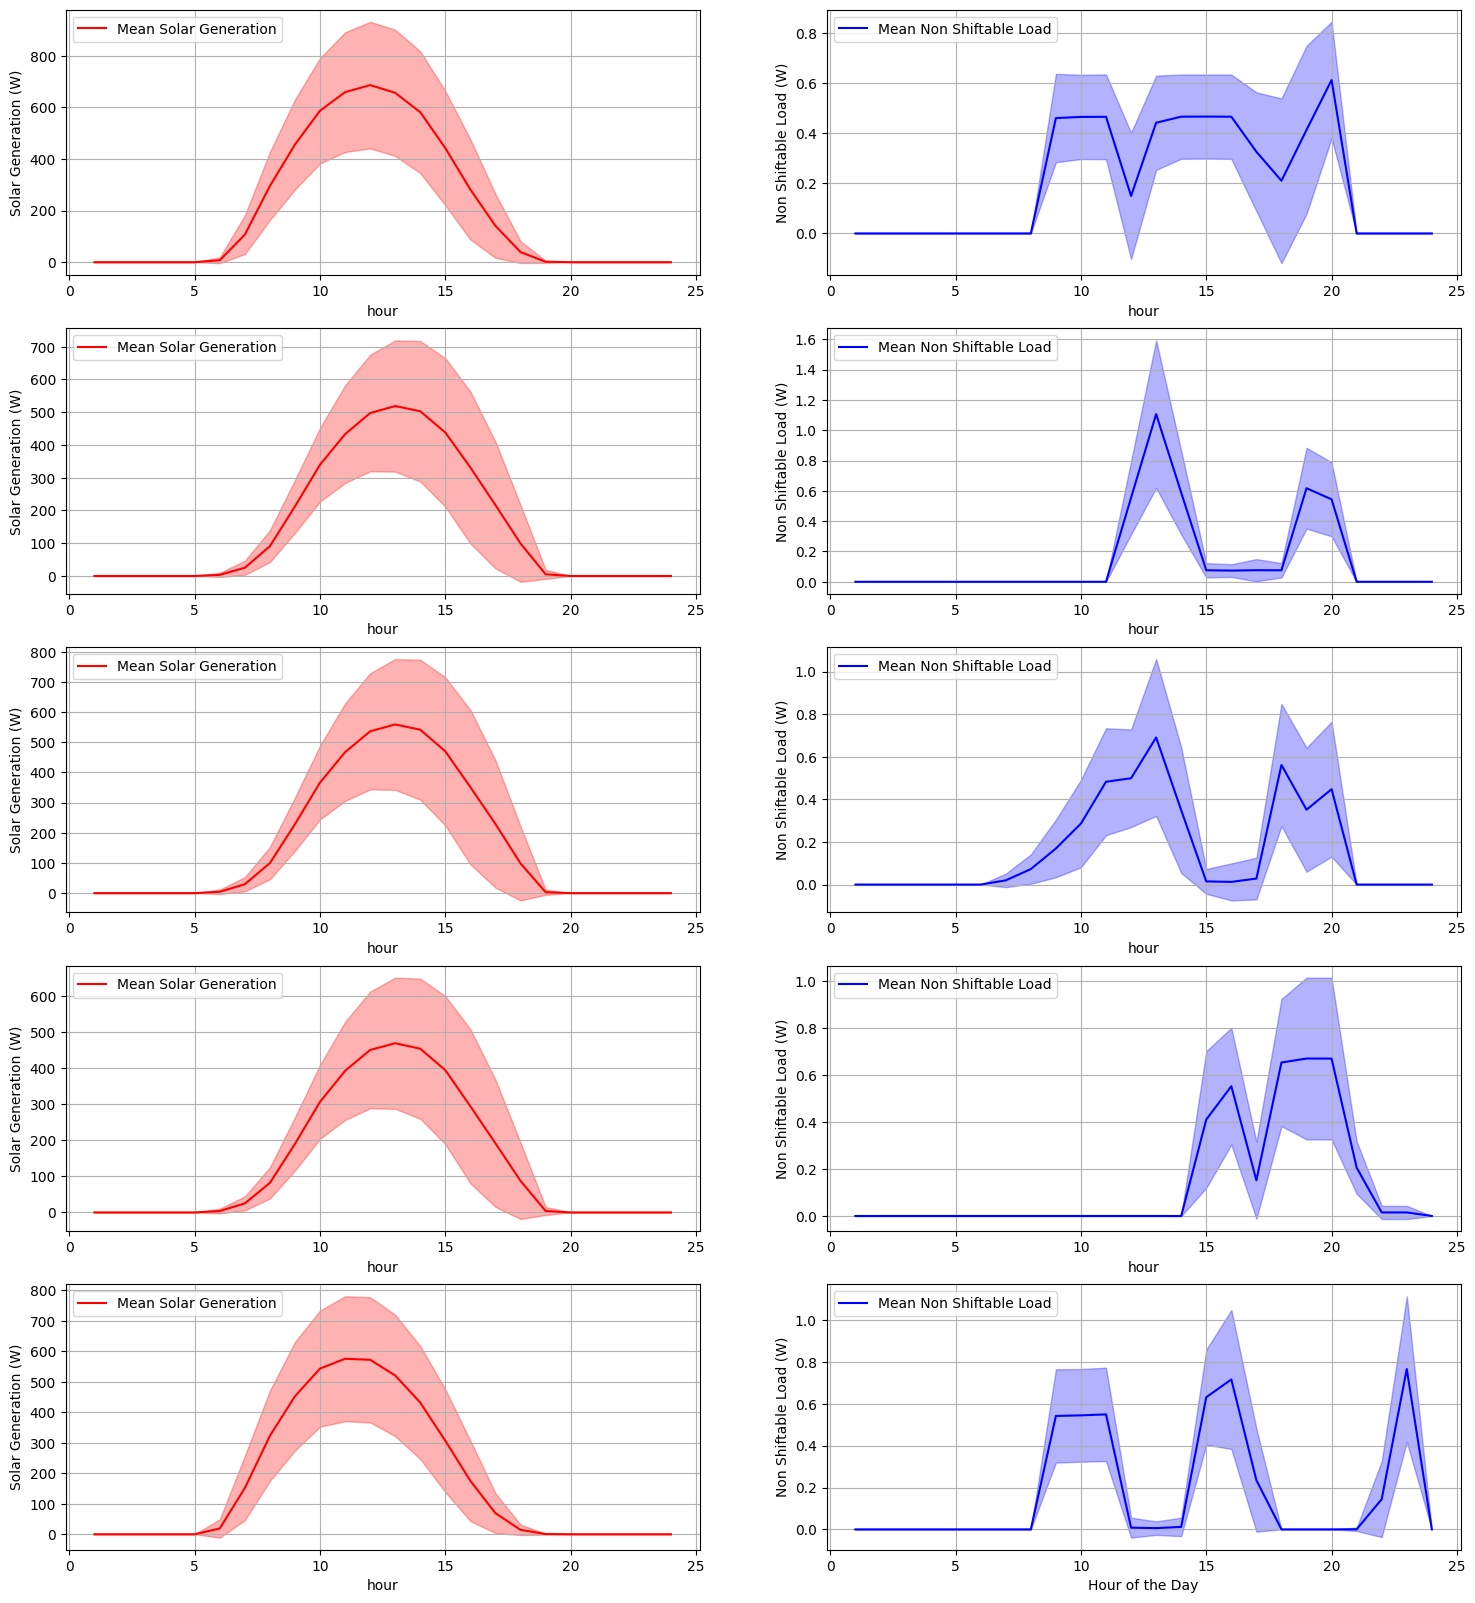

In [14]:
# Add the hour column to the data and plot the mean temperature, humidity, and direct solar irradiance for each hour of the day, for each building in subplots

fig, axs = plt.subplots(5, 2, figsize=(18, 20))

for b in range(5):

    # b_data[b]['hour'] = b_data[b].index % 24 + 1

    # Calculate mean and variance for solar generation
    solar_mean = b_data[b].groupby('hour')['solar_generation'].mean()
    solar_std = b_data[b].groupby('hour')['solar_generation'].std()

    # Calculate mean and variance for non shiftable load
    load_mean = b_data[b].groupby('hour')['non_shiftable_load'].mean()
    load_std = b_data[b].groupby('hour')['non_shiftable_load'].std()

    # Plot mean solar generation with variance envelope
    sns.lineplot(x=solar_mean.index, y=solar_mean, color='r', label='Mean Solar Generation', ax=axs[b, 0])
    axs[b, 0].fill_between(solar_mean.index, solar_mean - solar_std, solar_mean + solar_std, color='r', alpha=0.3)
    axs[b, 0].set_ylabel('Solar Generation (W)')
    axs[b, 0].grid()  # Add grid
    axs[b, 0].legend(loc='upper left')

    # Plot mean non shiftable load with variance envelope
    sns.lineplot(x=load_mean.index, y=load_mean, color='b', label='Mean Non Shiftable Load', ax=axs[b, 1])
    axs[b, 1].fill_between(load_mean.index, load_mean - load_std, load_mean + load_std, color='b', alpha=0.3)
    axs[b, 1].set_ylabel('Non Shiftable Load (W)')
    axs[b, 1].grid()  # Add grid
    axs[b, 1].legend(loc='upper left')

plt.xlabel('Hour of the Day')
plt.show()


In [ ]:
b_data[0].head()

In [ ]:
b_data[2].head()

In [ ]:
b_data[0]['solar_generation'].plot()
plt.show()

In [ ]:
w_data[0].head()

In [ ]:
w_data[0]['outdoor_dry_bulb_temperature'].plot()
plt.show()

In [8]:
def draw_graph(b1, b2, index):

    building1_name = "Building_"+str(b1+1)
    building2_name = "Building_"+str(b2+1)

    temp_random_1_b, temp_random_1_e = train_dict["buildings"][building1_name]["temp_random"]
    temp_random_2_b, temp_random_2_e = test_dict["buildings"][building2_name]["temp_random"]
    hum_random_1_b, hum_random_1_e = train_dict["buildings"][building1_name]["hum_random"]
    hum_random_2_b, hum_random_2_e = test_dict["buildings"][building2_name]["hum_random"]

    temp_train = []
    temp_test = []
    hum_train = []
    hum_test = []
    for temp_random in np.linspace(temp_random_1_b, temp_random_1_e, 2):
        temp_train.append(w_data[b1]["Outdoor Drybulb Temperature [C]"] + temp_random)
    for temp_random in np.linspace(temp_random_2_b, temp_random_2_e, 2):
        temp_test.append(w_data[b2]["Outdoor Drybulb Temperature [C]"] + temp_random)
    for hum_random in np.linspace(hum_random_1_b, hum_random_1_e, 2):
        hum_train.append(w_data[b1]["Relative Humidity [%]"] + hum_random)
    for hum_random in np.linspace(hum_random_2_b, hum_random_2_e, 2):
        hum_test.append(w_data[b2]["Relative Humidity [%]"] + hum_random)
    temp_train = np.array(temp_train)
    temp_test = np.array(temp_test)
    hum_train = np.array(hum_train)
    hum_test = np.array(hum_test)

    solar_train_base = np.array(b_data[b1]["Solar Generation [W/kW]"])
    solar_test_base = np.array(b_data[b2]["Solar Generation [W/kW]"])
    demand_train_base = np.array(b_data[b1]["Equipment Electric Power [kWh]"])
    demand_test_base = np.array(b_data[b2]["Equipment Electric Power [kWh]"])

    plot_demand_train = []
    plot_demand_test = []
    # day = np.array(list(range(0, 24)))

    solar_efficiency_tr = train_dict["buildings"][building1_name]["solar_efficiency"]
    solar_efficiency_te = test_dict["buildings"][building2_name]["solar_efficiency"]
    ac_efficiency_tr = train_dict["buildings"][building1_name]["ac_efficiency"]
    ac_efficiency_te = test_dict["buildings"][building2_name]["ac_efficiency"]
    # solar_intercept_tr = train_dict["buildings"][building1_name]["solar_intercept"]
    # solar_intercept_te = test_dict["buildings"][building2_name]["solar_intercept"]
    solar_panel_tr = train_dict["buildings"][building1_name]["solar_panel"]
    solar_panel_te = test_dict["buildings"][building2_name]["solar_panel"]

    if index == -1:     # solar
        # for temp_random in np.linspace(0, 20, 100):
        #     plot_demand_train.append((b_data[b1]["Solar Generation [W/kW]"]*i)/1000)
        # for j in np.linspace(4.0, 4.1, 100):
        #     plot_demand_test.append((b_data[b2]["Solar Generation [W/kW]"]*j)/1000)
        plot_demand_train = (temp_train*solar_efficiency_tr*solar_panel_tr**2) * solar_train_base / 1000
        plot_demand_test = (temp_test*solar_efficiency_te*solar_panel_te**2) * solar_test_base / 1000
    else:               # non shiftable demand
        # for i in np.linspace(0.1, 1, 100):
        #     plot_demand_train.append(b_data[b1]["Equipment Electric Power [kWh]"]+i)
        # for j in np.linspace(0, 0.1, 100):
        #     plot_demand_test.append(b_data[b2]["Equipment Electric Power [kWh]"]+j)
        plot_demand_train = (hum_train-60)/20/ac_efficiency_tr + (30-temp_train)/25/ac_efficiency_tr + demand_train_base
        plot_demand_test = (hum_test-60)/20/ac_efficiency_te + (30-temp_test)/25/ac_efficiency_te + demand_test_base

    plot_demand_train = np.array(plot_demand_train)
    plot_demand_test = np.array(plot_demand_test)

    df_train = pd.DataFrame()
    df_train["hour"] = list(range(0, 24)) * 2
    df_train["data"] = plot_demand_train.reshape(-1)

    df_test = pd.DataFrame()
    df_test["hour"] = list(range(0, 24)) * 2
    df_test["data"] = plot_demand_test.reshape(-1)

    # plt.plot(day, plot_demand_train[0], 'r--', label="Building "+str(b1+1)+" training")
    # for i in range(1, len(plot_demand_train)):
    #     plt.plot(day, plot_demand_train[i], 'r--')
    #     # print(plot_demand_train[i-4])

    # plt.plot(day, plot_demand_test[0], 'b--', label="Building "+str(b2+1)+" testing")
    # for i in range(1, len(plot_demand_test)):
    #     plt.plot(day, plot_demand_test[i], 'b--')
    # # plt.title("train_"+str(b1+1)+"_test_"+str(b2+1))

    sns.lineplot(x="hour", y="data", data=df_train, label="Building "+str(b1+1)+" training")
    sns.lineplot(x="hour", y="data", data=df_test, label="Building "+str(b2+1)+" testing")



    if index==-1:
        plt.title("Bldg. "+str(b1+1)+" tr & Bldg "+str(b2+1)+" te solar generation", fontsize = 20)
    else:
        plt.title("Bldg "+str(b1+1)+" tr & Bldg "+str(b2+1)+" te demand", fontsize = 20)

    plt.legend(loc="upper left", prop={'size': 10})
    plt.xlabel("hour")
    plt.show()

In [ ]:
for i in range(5):
    for j in range(5):
        draw_graph(i, j, -1)    # solar generation

In [ ]:
for i in range(5):
    for j in range(5):
        draw_graph(i, j, -5)    # demand

In [12]:
def draw_solar_demand(b1):


    building1_name = "Building_"+str(b1+1)

    temp_random_1_b, temp_random_1_e = train_dict["buildings"][building1_name]["temp_random"]
    temp_random_2_b, temp_random_2_e = test_dict["buildings"][building1_name]["temp_random"]
    hum_random_1_b, hum_random_1_e = train_dict["buildings"][building1_name]["hum_random"]
    hum_random_2_b, hum_random_2_e = test_dict["buildings"][building1_name]["hum_random"]

    temp_train = []
    temp_test = []
    hum_train = []
    hum_test = []
    for temp_random in np.linspace(temp_random_1_b, temp_random_1_e, 10):
        temp_train.append(w_data[b1]["Outdoor Drybulb Temperature [C]"] + temp_random)
    for temp_random in np.linspace(temp_random_2_b, temp_random_2_e, 10):
        temp_test.append(w_data[b1]["Outdoor Drybulb Temperature [C]"] + temp_random)
    for hum_random in np.linspace(hum_random_1_b, hum_random_1_e, 10):
        hum_train.append(w_data[b1]["Relative Humidity [%]"] + hum_random)
    for hum_random in np.linspace(hum_random_2_b, hum_random_2_e, 10):
        hum_test.append(w_data[b1]["Relative Humidity [%]"] + hum_random)
    temp_train = np.array(temp_train)
    temp_test = np.array(temp_test)
    hum_train = np.array(hum_train)
    hum_test = np.array(hum_test)

    solar_train_base = np.array(b_data[b1]["Solar Generation [W/kW]"])
    demand_train_base = np.array(b_data[b1]["Equipment Electric Power [kWh]"])

    plot_demand_train = []
    plot_demand_test = []
    day = np.array(list(range(0, 24)))

    solar_efficiency_tr = train_dict["buildings"][building1_name]["solar_efficiency"]
    ac_efficiency_tr = train_dict["buildings"][building1_name]["ac_efficiency"]
    solar_panel_tr = train_dict["buildings"][building1_name]["solar_panel"]

    plot_solar_train = (temp_train*solar_efficiency_tr*solar_panel_tr**2) * solar_train_base / 1000
    plot_demand_train = (hum_train-60)/20/ac_efficiency_tr + (30-temp_train)/25/ac_efficiency_tr + demand_train_base

    for i in range(len(plot_solar_train)):
        plt.plot(day, plot_solar_train[i], 'r.')
        # print(plot_demand_train[i-4])
    for i in range(len(plot_demand_train)):
        plt.plot(day, plot_demand_train[i], 'b--')
    plt.title("train_"+str(b1+1)+"_test_"+str(b1+1))
    plt.show()

In [ ]:
for i in range(5):
    draw_solar_demand(i)

In [ ]:
for i in range(5):
    draw_graph(i, i, -1)

In [ ]:
for i in range(5):
    draw_graph(i, i, -5)